<a href="https://colab.research.google.com/github/Tung003/Neural-networks-scrath/blob/master/Artificial_neural_networks_only_MATH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install pandas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install zip-files
import zipfile
path_file_train=r"/content/drive/MyDrive/Colab Notebooks/MNIST/train.csv.zip"
with zipfile.ZipFile(path_file_train, 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/Colab Notebooks/MNIST")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

data_set=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MNIST/train.csv")
data_train_frame=pd.DataFrame(data_set)
"""
dữ liệu train 42000 mẫu dữ liệu dùng 10% mẫu cho bộ test, còn lại 90% cho bộ train
"""
#chia bộ train và bộ test
data_set_for_train=data_train_frame[0:37800]
data_set_for_test =data_train_frame[37800:42000]

label_train=data_set_for_train["label"]
label_test =data_set_for_test["label"]

data_train=data_set_for_train.drop("label",axis=1)/255.
data_test=data_set_for_test.drop("label",axis=1)/255.


In [ ]:
def one_hot(labels,numclases=10):
  """0=>label=0000000000
  1=>label=0100000000
  4=>label=0000100000
  9=>label=0000000001"""
  label_return=np.zeros(numclases)
  label_return[labels]=1
  return label_return

class load_data:
  def __init__(self,data,label,shufle=True):
    self.data=np.array(data)
    self.label=np.array(label)
    if shufle:
      indices = np.arange(len(self.data))
      np.random.shuffle(indices)
      self.data = self.data[indices]
      self.label = self.label[indices]

  def __getitem__(self,index):
    return self.data[index],one_hot(self.label[index])

  def __len__(self):
    return len(self.data)

  def get_batch(self,batch_size):
    indices = np.random.choice(len(self.data), batch_size, replace=False)
    batch_X = self.data[indices]
    batch_y = np.array([one_hot(self.label[i]) for i in indices])
    return batch_X, batch_y

In [ ]:
class Layer:
  def __init__(self,input,output):
    self.input=None
    self.output=None

  def forward(self,input):
    pass

  def backward(self,output_gradien,learning_rate):
    pass

In [ ]:
class Activation(Layer):
  def __init__(self,activation,activation_prime):
    self.activation=activation
    self.activation_prime=activation_prime

  def forward(self,input):
    self.input=input
    return self.activation(self.input)
  def backward(self,output_gradient,lr):
    return np.multiply(self.activation_prime(self.input),output_gradient)

class Tanh(Activation):
  def __init__(self):
     super().__init__(self.tanh,self.tanh_prime)
  def tanh(self,x):
    return np.tanh(x)
  def tanh_prime(self,x):
    return 1-np.tanh(x)**2

class Softmax(Activation):
    def __init__(self):
        super().__init__(self.softmax, self.softmax_prime)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

    def softmax_prime(self, x):
        s = self.softmax(x)
        return s * (1 - s)

In [ ]:
class Artificial_Neuron_Networks_new(Layer):

    """input[2x3]=input[1x6]=>Z=X.W+B -> W[6 x output_size]
    vì 2 ma trận X và W nhân với nhau cho ra ma trận s'=[1x6].[6 x output_size]
    s'=[1 x output_size]
    và B phải có kích thước [1 x output_size] để cộng s' với B => Z=[1 x output_size]
    *{Z0=x0.W00 + x1.W10 + x2.W20 + x3.W30 + x4.W40 + x5.W50 + b0}
    {Z1=x0.W01 + x1.W11 + x2.W21 + x3.W31 + x4.W41 + x5.W51 + b1}
    {Z2=x0.W02 + x1.W12 + x2.W22 + x3.W32 + x4.W42 + x5.W52 + b2}
    {Z3=x0.W03 + x1.W13 + x2.W23 + x3.W33 + x4.W43 + x5.W53 + b3}
    {Z4=x0.W04 + x1.W14 + x2.W24 + x3.W34 + x4.W44 + x5.W54 + b4}
    {Z5=x0.W05 + x1.W15 + x2.W25 + x3.W35 + x4.W45 + x5.W55 + b5}
    {Z6=x0.W06 + x1.W16 + x2.W26 + x3.W36 + x4.W46 + x5.W56 + b6}"""
    def __init__(self,num_in_neuron,num_out_neuron,activation=None):
      #super().__init__(num_in_neuron, num_out_neuron)
      self.weight = np.random.randn(num_in_neuron, num_out_neuron)
      self.bias=np.zeros((1,num_out_neuron))+0.5
      self.activation=activation

    def forward(self,input):
      """nếu input có 6 neural đầu vào và ta đặt số neural đầu ra là 7
      w có kích thước là 6 hàng 7 cột
      b có kích thước là 1 hàng 7 cột"""
      self.input=input
      return np.dot(self.input,self.weight)+self.bias #Z=X.W+B


    def backward(self,output_gradient,lr):
      """ta cần tính được đạo hàm của hàm lỗi E với W, X, B và với Z
    tính đạo hàm riêng dE/dW: giả sử ta dùng hàm loss E là MSE = 1/2(Z-Z')^2
    + tính đạo hàm dE/dW00 theo quy tắc chuỗi nối tiếp thì
    dE/dW00= (dE/dZ0).(dZ0/dW00) + (dE/dZ1).(dZ1/dW00) +...+ (dE/dZ6).(dZ6/dW00)
    dE/dW13= (dE/dZ0).(dZ0/dW13) + (dE/dZ1).(dZ1/dW13) +..+ (dE/dZ3).(dZ3/dW13) + ...
    ở đây có thể thấy được rằng từ (*) ở trên
    thì dE/dW00 chỉ có (dE/dZ0).dZ0/dW00 {dZ0/dW00 = x0 còn các giá trị dZ1/dW00...đều bằng 0}
    => dE/dW00 = (dE/dZ0). x0 ; dE/dW13 = (dE/dZ3).x1
    theo quỹ tắc đạo hàm theo chuỗi thì ta cũng có thể đổi vị trí hay phép tính
    dE/dW13 = (dE/dZ3).x1 hoặc x1.(dE/dZ3)
    từ đây rút ra công thức tổng quát: dE/dW(i,j)=xi.(dE/dZj)
    và rút ra công thức theo ma trận: Xt.(dE/dZ) (**)
    """
      w_grad=np.dot(self.input.T,output_gradient)
      bias_grad = np.mean(output_gradient, axis=0, keepdims=True)
      self.weight-=lr*w_grad
      self.bias-=lr* bias_grad
      return np.dot(output_gradient,self.weight.T)

In [ ]:
networks=[Artificial_Neuron_Networks_new(784,512),
          Tanh(),
          Artificial_Neuron_Networks_new(512,256),
          Tanh(),
          Artificial_Neuron_Networks_new(256,128),
          Tanh(),
          Artificial_Neuron_Networks_new(128,64),
          Tanh(),
          Artificial_Neuron_Networks_new(64,32),
          Tanh(),
          Artificial_Neuron_Networks_new(32,10),
          Softmax()]

In [ ]:
def pred(networks,input):
  output=input
  for layer in networks:
    output=layer.forward(output)
  return output
def cross_entropy_loss(y_true, y_pred):
    """tính cross-entropy loss giữa nhãn thật và nhãn dự đoán của mô hình"""
    # Thêm epsilon để tránh log(0)
    return -np.sum(y_true * np.log(y_pred + 1e-9))

In [ ]:
def accuracy(y_predict, y_true):
    """
    Tính độ chính xác của mô hình.
    y_predict: Dự đoán đầu ra (batch_size, num_classes)
    y_true: Nhãn thực tế (batch_size, num_classes) (one-hot encoded)
    """
    predict_labels = np.argmax(y_predict, axis=1)  # Lấy chỉ số lớp có xác suất cao nhất
    true_labels = np.argmax(y_true, axis=1)  # Lấy chỉ số lớp từ one-hot encoding
    return np.mean(predict_labels == true_labels)  # Tính tỷ lệ dự đoán đúng


In [ ]:
def train(networks, data_loader, epochs=10, batch_size=32, learning_rate=0.01):
    """
    Huấn luyện mạng neural network.
    networks: 1 mảng các lớp kết nối đầy đủ.
    data_loader: dữ liệu huấn luyện.
    epochs: số vòng lặp huấn luyện(số lần toàn bộ dữ liệu được huấn luyện cho mô hình).
    batch_size: số lượng mẫu mỗi batch.
    learning_rate: tốc độ học.
    """

    for epoch in range(epochs):
        total_loss = 0
        total_acc = 0
        num_batches = len(data_loader) // batch_size

        for _ in range(num_batches):
            # lấy batch dữ liệu huấn luyện và dữ liệu nhãn
            batch_X, batch_y = data_loader.get_batch(batch_size)

            # quá trình forward
            output = batch_X
            for layer in networks:
                output = layer.forward(output)

            # tính toán loss
            loss = cross_entropy_loss(batch_y, output)
            total_loss += loss

            # tính toán độ chính xác accuracy
            acc = accuracy(output, batch_y)
            total_acc += acc

            # quá trình backward
            grad = output - batch_y  # gradient loss (softmax + crossEntropy)
            for layer in reversed(networks):
                grad = layer.backward(grad, learning_rate)

        # trung bình loss và accuracy trong epoch
        avg_loss = total_loss / num_batches
        avg_acc = total_acc / num_batches
        print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Accuracy: {avg_acc:.4f}")

# load data train và test
train_loader = load_data(data_train, label_train)
test_loader=load_data(data_test,label_test)


Epoch 1/70 - Loss: 123.4725 - Accuracy: 0.1317
Epoch 2/70 - Loss: 70.7750 - Accuracy: 0.1949
Epoch 3/70 - Loss: 67.0799 - Accuracy: 0.2286
Epoch 4/70 - Loss: 63.7097 - Accuracy: 0.2715
Epoch 5/70 - Loss: 59.4601 - Accuracy: 0.3218
Epoch 6/70 - Loss: 56.3496 - Accuracy: 0.3553
Epoch 7/70 - Loss: 53.1628 - Accuracy: 0.3917
Epoch 8/70 - Loss: 50.2894 - Accuracy: 0.4219
Epoch 9/70 - Loss: 48.2692 - Accuracy: 0.4396
Epoch 10/70 - Loss: 46.5585 - Accuracy: 0.4634
Epoch 11/70 - Loss: 44.9128 - Accuracy: 0.4738
Epoch 12/70 - Loss: 44.3791 - Accuracy: 0.4890
Epoch 13/70 - Loss: 42.8317 - Accuracy: 0.5030
Epoch 14/70 - Loss: 41.6073 - Accuracy: 0.5199
Epoch 15/70 - Loss: 40.6102 - Accuracy: 0.5454
Epoch 16/70 - Loss: 40.1077 - Accuracy: 0.5567
Epoch 17/70 - Loss: 38.8177 - Accuracy: 0.5782
Epoch 18/70 - Loss: 38.4978 - Accuracy: 0.5773
Epoch 19/70 - Loss: 36.6488 - Accuracy: 0.6026
Epoch 20/70 - Loss: 36.2770 - Accuracy: 0.6087
Epoch 21/70 - Loss: 35.4805 - Accuracy: 0.6208
Epoch 22/70 - Loss: 3

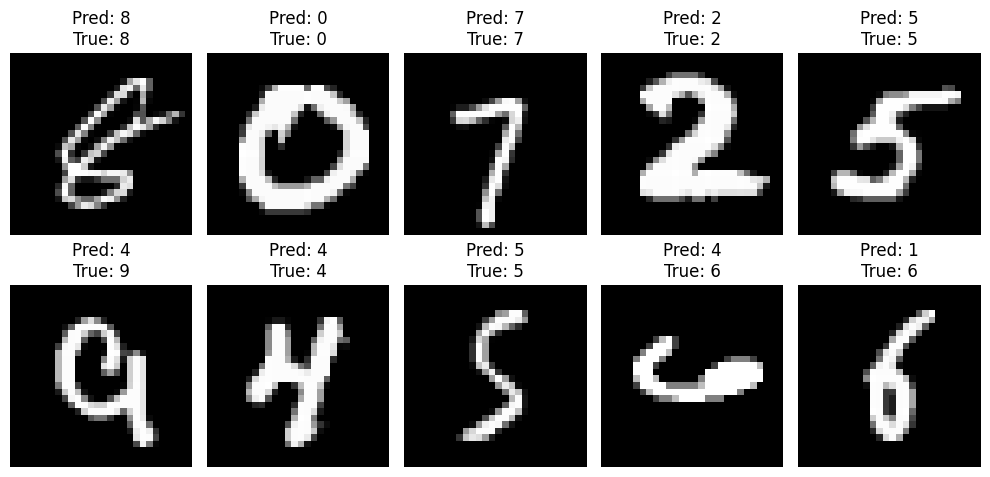

In [ ]:
def visualize_predictions(networks, data_loader, num_samples=10):
    """
    hiển thị 10 ảnh từ tập test cùng với nhãn thực tế và nhãn dự đoán của model.
    """
    batch_X, batch_y = data_loader.get_batch(num_samples)  # Lấy 10 ảnh từ tập test

    output = batch_X
    for layer in networks:
        output = layer.forward(output)

    predictions = np.argmax(output, axis=1)
    true_labels = np.argmax(batch_y, axis=1)

    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    axes = axes.ravel()  # Chuyển ma trận axes thành mảng 1D để dễ truy cập

    for i in range(num_samples):
        axes[i].imshow(batch_X[i].reshape(28, 28), cmap='gray')  # Chuyển về ảnh 28x28
        axes[i].set_title(f"Pred: {predictions[i]}\nTrue: {true_labels[i]}")
        axes[i].axis('off')  # Tắt trục tọa độ

    plt.tight_layout()
    plt.show()

# Huấn luyện mô hình
train(networks, train_loader, epochs=70, batch_size=32, learning_rate=0.005)

# Hiển thị dự đoán trên 10 ảnh test ngay sau khi train
visualize_predictions(networks, test_loader, num_samples=10)


In [ ]:
# Lưu lại trọng số mô hình sau khi huấn luyện vào file npz để khi cần tiếp tục train
# Hoặc phục vụ các mục đích khác.
def save_weights(networks, filename="model_weights.npz"):
    weights = {}
    biases = {}

    for i, layer in enumerate(networks):
        # Chỉ lưu những lớp có trọng số mà không lưu các lớp như Tanh...
        if hasattr(layer, "weight") and hasattr(layer, "bias"):
            weights[f"W_{i}"] = layer.weight
            biases[f"b_{i}"] = layer.bias

    np.savez(filename, **weights, **biases)
    print(f"Trọng số đã được lưu vào {filename}")

save_weights(networks)


Trọng số đã được lưu vào model_weights.npz


In [ ]:
def load_weights(networks, filename="model_weights.npz"):
    data = np.load(filename)
    for i, layer in enumerate(networks):
        if hasattr(layer, "weight") and hasattr(layer, "bias"):
            layer.weight = data[f"W_{i}"]
            layer.bias = data[f"b_{i}"]
    print(f"Trọng số đã được tải từ {filename}")

load_weights(networks)


Trọng số đã được tải từ model_weights.npz


In [ ]:
def test_model(networks, data_loader, num_samples=10):
    batch_X, batch_y = data_loader.get_batch(num_samples)  # Lấy 10 mẫu test

    output = batch_X
    for layer in networks:
        output = layer.forward(output)

    predictions = np.argmax(output, axis=1)
    true_labels = np.argmax(batch_y, axis=1)

    print("Dự đoán  |  Nhãn thật")
    print("-" * 20)
    for pred, true in zip(predictions, true_labels):
        print(f"   {pred}       |     {true}")

load_weights(networks, "model_weights.npz")

test_model(networks, test_loader, num_samples=10)


Trọng số đã được tải từ model_weights.npz
Dự đoán  |  Nhãn thật
--------------------
   3       |     5
   9       |     9
   9       |     9
   8       |     8
   4       |     4
   2       |     2
   7       |     7
   0       |     0
   9       |     9
   6       |     6
